In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**LECTURA DEL ARCHIVO**

In [ ]:
#---------dataset de Clima Dahli-------------

df_dahli = pd.read_csv("/content/drive/MyDrive/DailyDelhiClimateTrain.csv")
print(df_dahli.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
df_dahli = pd.read_csv("/content/DailyDelhiClimateTrain.csv")
print(df_dahli.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


**Grafica se la serie de tiempo original**

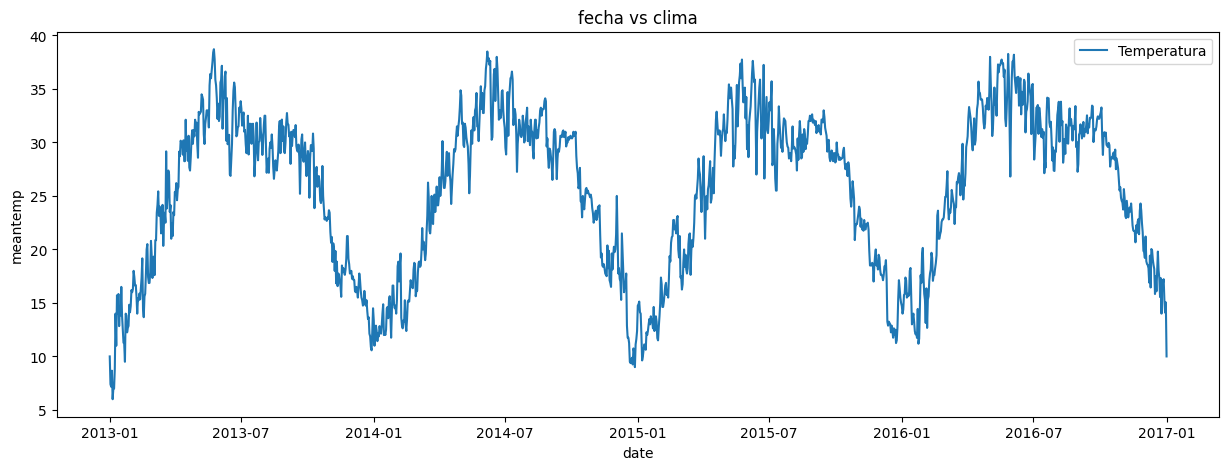

In [ ]:
df_dahli['date'] = pd.to_datetime(df_dahli['date'])
#unique_years = df_dahli['date'].dt.year.unique()
_fig_, _axs_ = plt.subplots(nrows = 1, figsize = (15, 5))
_fig_.subplots_adjust(hspace = 0.3, wspace = 0.3)
_axs_.set(title = "fecha vs clima")
#_axs_.set_xticklabels(unique_years)
_ = sns.lineplot(x = df_dahli["date"], y = df_dahli['meantemp'], label = "Temperatura", ax = _axs_)

**Punto 1 Ajustar el mejor modelo en funcion del tiempo y no linealidades**

In [ ]:
#Coeficientes hechos a mano (OLS)
#'t': t, 't2': t**2, 'sin_t': np.sin(0.2*t)
t = np.arange(1,1463)
Zq = np.zeros((1462,5))

#caracteristicas con respecto al tiempo
columna_de_unos = np.ones((1, len(t)), dtype=int)
Zq[:,0] = columna_de_unos
Zq[:,1] = t
Zq[:,2] = t**2
Zq[:,3] = np.sin(0.2*t)
Zq[:,4] = np.cos(0.2*t)
xd = df_dahli['meantemp']

print("Tamaño de Z ", Zq.shape)

X = xd.to_numpy()
X = X.reshape(-1,1)

B_1 = (np.linalg.inv((np.matmul(Zq.T,Zq)))@(Zq.T))@X
print(B_1)

Tamaño de Z  (1462, 5)
[[ 2.36656231e+01]
 [ 2.96836463e-03]
 [-4.76995788e-07]
 [-1.81757863e-01]
 [ 3.67393763e-02]]


In [ ]:
#Modelo mediante statics


data = pd.DataFrame({"temp":df_dahli["meantemp"],"t":t,"t2":t**2,"t_sin":np.sin(2*np.pi*0.0027*t),"t_cos":np.cos(2*np.pi*0.0027*t)})
#predecir consumo de energia (y) a partir de temperatura(x1), presion(x2) y
#velocidad del viento (x3)

y_aux_dehli = df_dahli["meantemp"]
x1_aux_dehli = t
x2_aux_dehli = t**2
x3_aux_dehli = np.sin(2*np.pi*0.0027*t)
x4_aux_dehli = np.cos(2*np.pi*0.0027*t)

#crea el modulo medinate OLS y se ajusta a los datos de df_aux
modelo_aux = sm.OLS.from_formula('y_aux_dehli ~ x1_aux_dehli + x2_aux_dehli + x3_aux_dehli +  x4_aux_dehli', data=data).fit()

In [ ]:
#para ver los betas (B) que arroja el modelo de libreria y los calculados a mano

coeficientes = modelo_aux.params

print("CON LIBRERIA STATS MODELS\n", coeficientes)
print("\nCOEFICIENTES CALCULADOS A MANO\n", B_1 )

CON LIBRERIA STATS MODELS
 Intercept       2.392904e+01
x1_aux_dehli    1.654595e-03
x2_aux_dehli    3.251356e-07
x3_aux_dehli    1.043688e+00
x4_aux_dehli   -9.318682e+00
dtype: float64

COEFICIENTES CALCULADOS A MANO
 [[ 2.36656231e+01]
 [ 2.96836463e-03]
 [-4.76995788e-07]
 [-1.81757863e-01]
 [ 3.67393763e-02]]


In [ ]:
#Vamos a revisar los tamaños


wt = np.random.normal(0,1,Zq.shape[0])
Wt = wt.reshape(-1,1)
print("Tamaño de los betas",B_1.shape)
print("Tamaño de los Z ", Zq.shape)
print("Tamaño de ruido blanco ", Wt.shape)

print("tamaño antes de sumar ruido" ,np.matmul(B_1.T,Zq.T).shape)
Xt = np.matmul(B_1.T,Zq.T) + Wt.T
print(Xt.shape)

Tamaño de los betas (5, 1)
Tamaño de los Z  (1462, 5)
Tamaño de ruido blanco  (1462, 1)
tamaño antes de sumar ruido (1, 1462)
(1, 1462)


In [ ]:
print(y_aux_dehli)

0       10.000000
1        7.400000
2        7.166667
3        8.666667
4        6.000000
          ...    
1457    17.217391
1458    15.238095
1459    14.095238
1460    15.052632
1461    10.000000
Name: meantemp, Length: 1462, dtype: float64


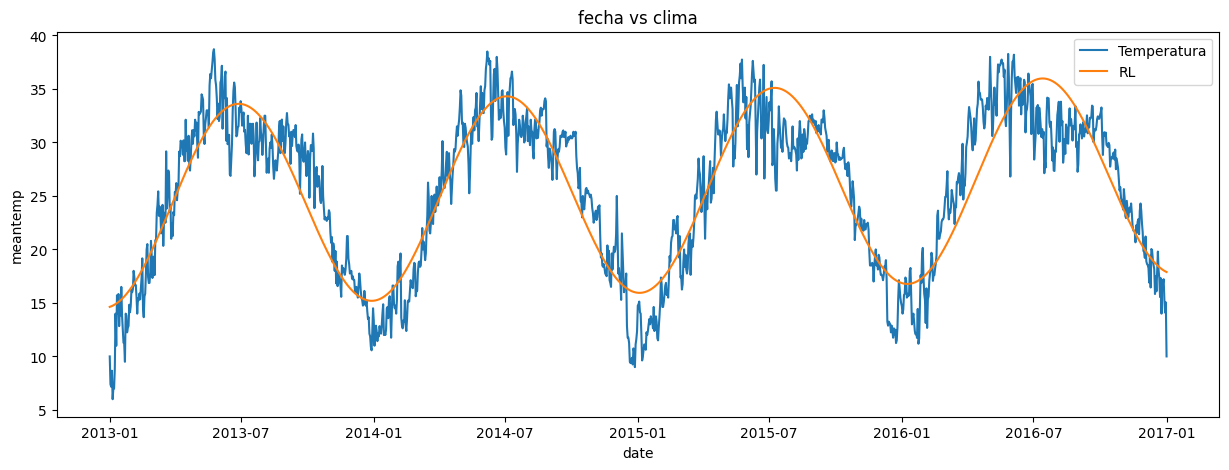

In [ ]:
_fig_, _axs_ = plt.subplots(nrows = 1, figsize = (15, 5))
_fig_.subplots_adjust(hspace = 0.3, wspace = 0.3)
_axs_.set(title = "fecha vs clima")
_ = sns.lineplot(x = df_dahli["date"], y = y_aux_dehli, label = "Temperatura", ax = _axs_)
_ = sns.lineplot(x = df_dahli["date"], y = modelo_aux.fittedvalues, label = "RL")

**Punto 2 Analisis de Varianza para determinar variables de mayor impacto**

In [ ]:
#Realizar el análisis de varianza para determinar cuáles variables tienen más impacto en el modelo
#en este caso PR(>F) contiene el valor de p si es menor a 0.05 entonces
#la variable es significativa para el modelo

#para este caso solo seria x2_aux
anova_results = sm.stats.anova_lm(modelo_aux, typ=2)
print(anova_results)

                    sum_sq      df            F        PR(>F)
x1_aux_dehli     44.373402     1.0     4.569042  3.272081e-02
x2_aux_dehli      3.921219     1.0     0.403760  5.252535e-01
x3_aux_dehli    775.872433     1.0    79.890059  1.169350e-18
x4_aux_dehli  62581.940433     1.0  6443.939389  0.000000e+00
Residual      14150.022479  1457.0          NaN           NaN


**Punto 3 Calcular las metricas R2, AICc y BIC**

In [ ]:
#Valores del modelo
y_pred = modelo_aux.fittedvalues
#valores reales
y = y_aux_dehli

In [ ]:
SSE  = ((y - y_pred)**2).sum()
print(SSE)


14150.022479226878


In [ ]:
q = 4
MSE = (SSE) / (xd.shape[0] - (q+1))
print(MSE)

9.711751873182484


In [ ]:
SSE0 =  ( (y - np.mean(y))**2).sum()
print(SSE0)

78886.13056238546


In [ ]:
#R2 a mano
r2 = (SSE0 - SSE) / SSE0
print(r2)

0.8206272461540419


In [ ]:
#R2 con la libreria
r_cuadrado = modelo_aux.rsquared
print(r_cuadrado)

0.8206272461540418


**Se calcula el modelo con k caracterizticas importantes:**


**Recordatorio, se obtienen Pr(>f) que son las prob de que acontezca el evento
Si son muy pequeñas significa que en la grafica estan hasta el costado, por lo tanto tiene mas varianza y son mas significativas**

In [ ]:
anova_results_ordenate = anova_results.sort_values('PR(>F)',ascending=True)
anova_results_ordenate.head()
anova_results_ordenate.info()
anova_results_ordenate.shape

anova_results_ordenate.index
print(anova_results_ordenate)

k=2
k_caracterizticas_mas_importantes = list(anova_results_ordenate.index[:k])
print(k_caracterizticas_mas_importantes)

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, x4_aux_dehli to Residual
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sum_sq  5 non-null      float64
 1   df      5 non-null      float64
 2   F       4 non-null      float64
 3   PR(>F)  4 non-null      float64
dtypes: float64(4)
memory usage: 200.0+ bytes
                    sum_sq      df            F        PR(>F)
x4_aux_dehli  62581.940433     1.0  6443.939389  0.000000e+00
x3_aux_dehli    775.872433     1.0    79.890059  1.169350e-18
x1_aux_dehli     44.373402     1.0     4.569042  3.272081e-02
x2_aux_dehli      3.921219     1.0     0.403760  5.252535e-01
Residual      14150.022479  1457.0          NaN           NaN
['x4_aux_dehli', 'x3_aux_dehli']


In [ ]:
def modelo_entrenar_k_caracterizticas(k_caracterizticas_mas_importantes):
  modelo_k_caracteristicas = sm.OLS.from_formula(' y_aux_dehli ~ ' + ' + '.join(k_caracterizticas_mas_importantes), data=data).fit()
  coeficientes_k_caracterizticas = modelo_k_caracteristicas.params
  print("CON LIBRERIA STATS MODELS\n", coeficientes_k_caracterizticas)
  return modelo_k_caracteristicas



In [ ]:
#MODELO CON UNA CARACTERISTICA, QUE ES LA MAS IMPORTANTE SEGÚN ANOVA
caract_1 = list(anova_results_ordenate.index[:1])
modelo_1 =modelo_entrenar_k_caracterizticas(caract_1)
y_pred_1 = modelo_1.fittedvalues

CON LIBRERIA STATS MODELS
 Intercept       25.372981
x4_aux_dehli    -9.352617
dtype: float64


In [ ]:
#Modelo con 2 caracteristicas importantes
modelo_k =modelo_entrenar_k_caracterizticas(k_caracterizticas_mas_importantes)
anova_results = sm.stats.anova_lm(modelo_k, typ=2)
#print(anova_results)

CON LIBRERIA STATS MODELS
 Intercept       25.371284
x4_aux_dehli    -9.355926
x3_aux_dehli     0.798685
dtype: float64


In [ ]:
#Modelo con 3 caracteristicas importantes
caract_3 = list(anova_results_ordenate.index[:3])
modelo_3 =modelo_entrenar_k_caracterizticas(caract_3)
y_pred_3 = modelo_3.fittedvalues

CON LIBRERIA STATS MODELS
 Intercept       23.812993
x4_aux_dehli    -9.317236
x3_aux_dehli     1.043459
x1_aux_dehli     0.002130
dtype: float64


In [ ]:
#Valores del modelo
y_pred_k = modelo_k.fittedvalues
#valores reales
y = y_aux_dehli

In [ ]:

SSEk  = ((y - y_pred_k)**2).sum()
SSEk_1  = ((y - y_pred_1)**2).sum()
SSEk_2  = ((y - y_pred_3)**2).sum()
print("SSEK para modelo (1) con  ",SSEk_1)
print("SSEK para modelo (2) ",SSEk)
print("SSEK para modelo (3) ",SSEk_2)

SSEK para modelo (1) con   15762.31937254429
SSEK para modelo (2)  15290.22447128778
SSEK para modelo (3)  14153.94369825028


In [ ]:
#-------------- AIC----------------

N = len(y) #numero total de datos
k=3
varianza_estimada = SSEk / N
aic = np.log(varianza_estimada) + (N+2*k)/N
#print(np.log(varianza_estimada))
#print((N+2*k)/N )

k = 2
varianza_estimada_1 = SSEk_1 / N
aic_1 = np.log(varianza_estimada_1) + (N+2*k)/N

k = 4
varianza_estimada_2 = SSEk_2 / N
aic_2 = np.log(varianza_estimada_2) + (N+2*k)/N
print("AIC modelo (1): ", aic_1)
print("AIC modelo (2): ", aic)
print("AIC modelo (3): ", aic_2)

AIC modelo (1):  3.380552858694776
AIC modelo (2):  3.351512306595255
AIC modelo (3):  3.275659886744669


In [ ]:
#-------------- AICC----------------
k=3
aicc = np.log(varianza_estimada) + (N+k)/(N-k-2)
#print(np.log(varianza_estimada))
#print((N+k)/(N-k-2)   )

k = 2
aicc_1 = np.log(varianza_estimada_1) + (N+k)/(N-k-2)

k = 4
aicc_2 = np.log(varianza_estimada_2) + (N+k)/(N-k-2)
print("AICc para modelo (1): ", aicc_1)
print("AICc para modelo (2): ", aicc)
print("AICc para modelo (3): ", aicc_2)

AICc para modelo (1):  3.3819321069200496
AICc para modelo (2):  3.3528990738127167
AICc para modelo (3):  3.277056062388451


In [ ]:
#---------------BIC-----------------
k=3
bic = np.log(varianza_estimada) + (k*np.log(N))/N
#print( (k*np.log(N))/N)

k=2
bic_1 = np.log(varianza_estimada_1) + (k*np.log(N))/N

k=4
bic_2 = np.log(varianza_estimada_2) + (k*np.log(N))/N
print("BIC para modelo (1): ",bic_1)
print("BIC para modelo (2): ",bic)
print("BIC para modelo (3): ",bic_1)

BIC para modelo (1):  2.3877861837841188
BIC para modelo (2):  2.3623622942292695
BIC para modelo (3):  2.3877861837841188


**Punto 4 Volver la serie de tiempo estacionaria restando la real menos la predicha por el modelo**


In [ ]:
#estacionaria
y_detrended = y - y_pred_k

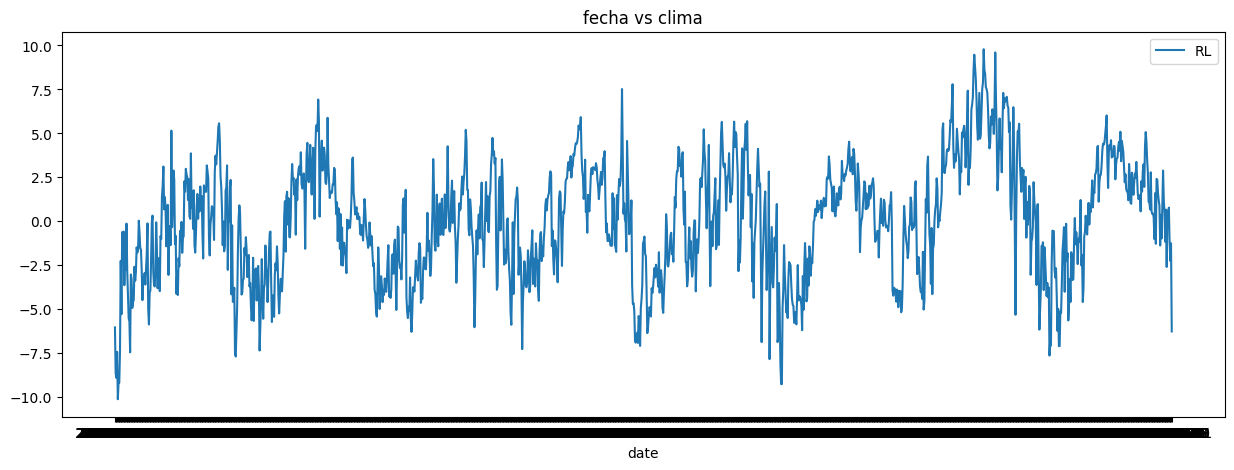

In [ ]:
#Grafica de la serie de tiempo estacionaria
_fig_, _axs_ = plt.subplots(nrows = 1, figsize = (15, 5))
_fig_.subplots_adjust(hspace = 0.3, wspace = 0.3)
_axs_.set(title = "fecha vs clima")
_ = sns.lineplot(x = df_dahli["date"], y = y_detrended, label = "RL")


In [ ]:
print(np.sqrt(varianza_estimada_1))

3.283495119548481


**Punto 5 Correlograma de la serie de tiempo estacionaria**

In [ ]:
serie_temporal = y
serie_temporal_diferenciada = serie_temporal.diff().dropna()


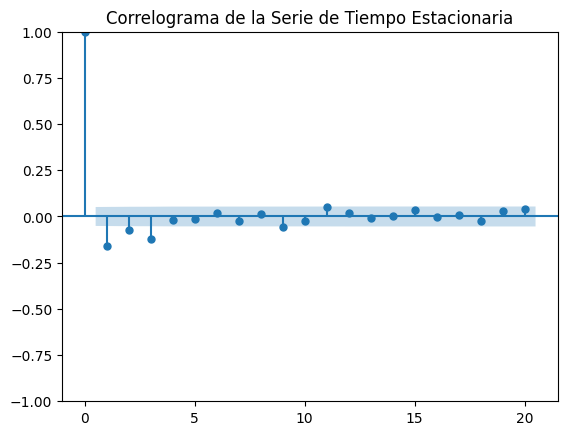

In [ ]:
plot_acf(serie_temporal_diferenciada, lags=20)  # Ajusta los pasos en el tiempo (lags) :)
plt.title("Correlograma de la Serie de Tiempo Estacionaria")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

In [ ]:
test_stationarity(y)

ADF Statistic: -2.0210690559206737
p-value: 0.2774121372301601


In [ ]:
test_stationarity(serie_temporal_diferenciada)

ADF Statistic: -16.378720267074673
p-value: 2.764863137594644e-29
